Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8932 - loss: 0.3172 - val_accuracy: 0.9812 - val_loss: 0.0758
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9830 - val_loss: 0.0571
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9929 - loss: 0.0297 - val_accuracy: 0.9839 - val_loss: 0.0578
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.9958 - loss: 0.0157 - val_accuracy: 0.9839 - val_loss: 0.0619
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.9821 - val_loss: 0.0615
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9982 - loss: 0.0044 - val_accuracy: 0.9857 - val_loss: 0.0640
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9812 - val_loss: 0.0768
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy:

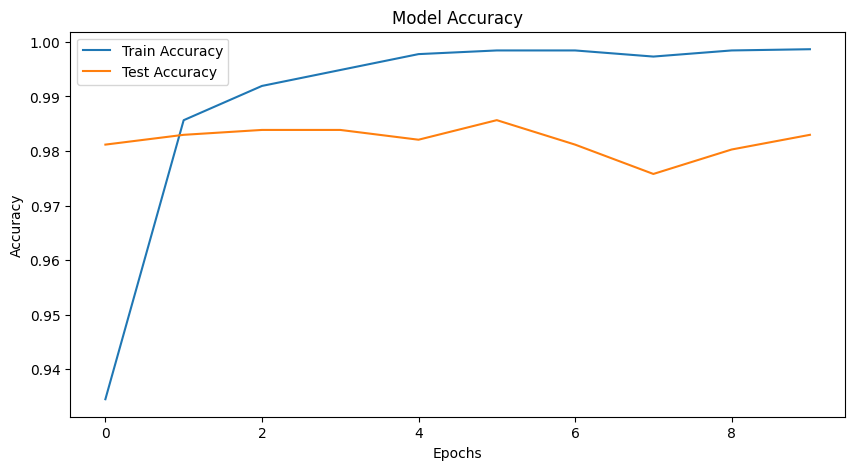

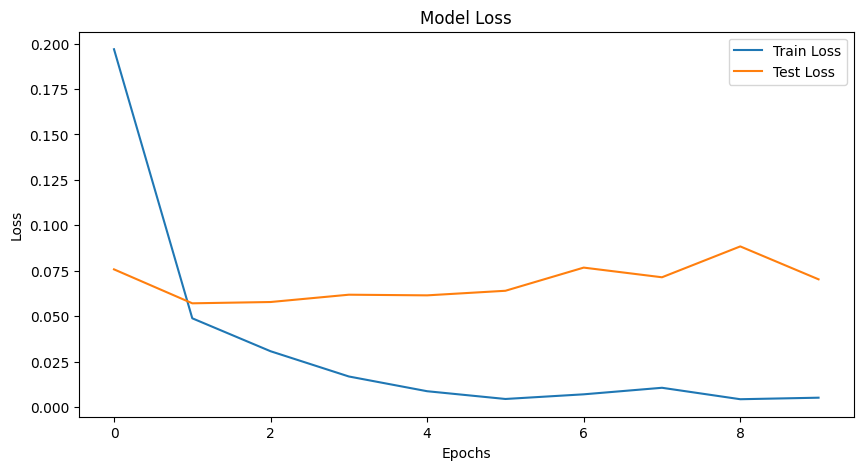

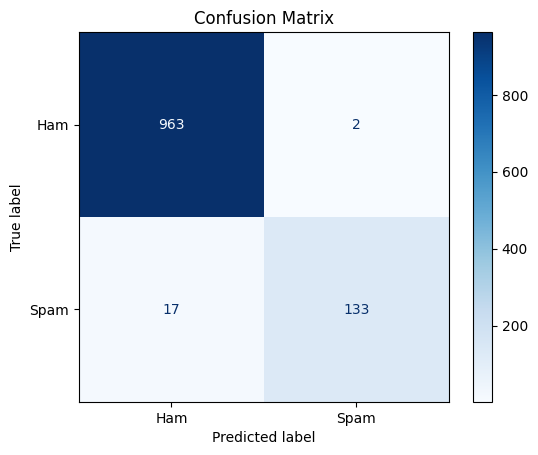

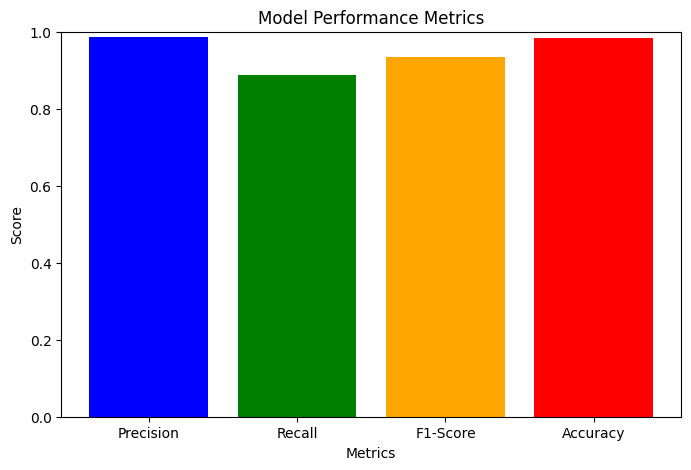

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
file_path = "sma.csv"  # Update path if needed
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text Preprocessing Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# Tokenization & Padding
max_words = 5000  # Limit vocabulary size
max_len = 100  # Max length of each sequence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_message'])
X = tokenizer.texts_to_sequences(df['cleaned_message'])
X = pad_sequences(X, maxlen=max_len)
y = np.array(df['label'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Output layer (spam or ham)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Making Predictions on Test Data
y_pred = model.predict(X_test)  # Get predictions
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print Metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plotting the Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plotting Precision, Recall, F1-Score, and Accuracy
metrics = [precision, recall, f1, accuracy]
metrics_names = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis to range from 0 to 1
plt.show()
